In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
data = pd.read_csv('TCS.NS.csv')

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,13MA,...,-DI,DX,ADX,VWAP,Upper_Band,Lower_Band,MACD,Signal_line,%K,%D
0,2019-03-15,1998.900024,2068.949951,1991.000000,2039.949951,1825.726929,5184318,NaN,NaN,NaN,...,NaN,NaN,NaN,2033.299967,NaN,NaN,0.000000,0.000000,NaN,NaN
1,2019-03-18,2043.000000,2064.600098,2011.000000,2022.800049,1810.377930,2349915,NaN,NaN,NaN,...,NaN,NaN,NaN,2033.144044,NaN,NaN,-1.368083,-0.273617,NaN,NaN
2,2019-03-19,2030.000000,2030.000000,1995.099976,2022.800049,1810.377930,2373993,NaN,NaN,NaN,...,NaN,NaN,NaN,2029.028377,NaN,NaN,-2.424353,-0.703764,NaN,NaN
3,2019-03-20,2028.000000,2044.800049,2000.000000,2015.050049,1803.442139,3091165,NaN,NaN,NaN,...,NaN,NaN,NaN,2026.869610,NaN,NaN,-3.842520,-1.331515,NaN,NaN
4,2019-03-22,2015.000000,2016.000000,1983.300049,2005.650024,1795.029053,3148149,NaN,NaN,NaN,...,NaN,NaN,NaN,2021.952761,NaN,NaN,-5.659690,-2.197150,NaN,NaN


In [5]:
data.shape

(1236, 24)

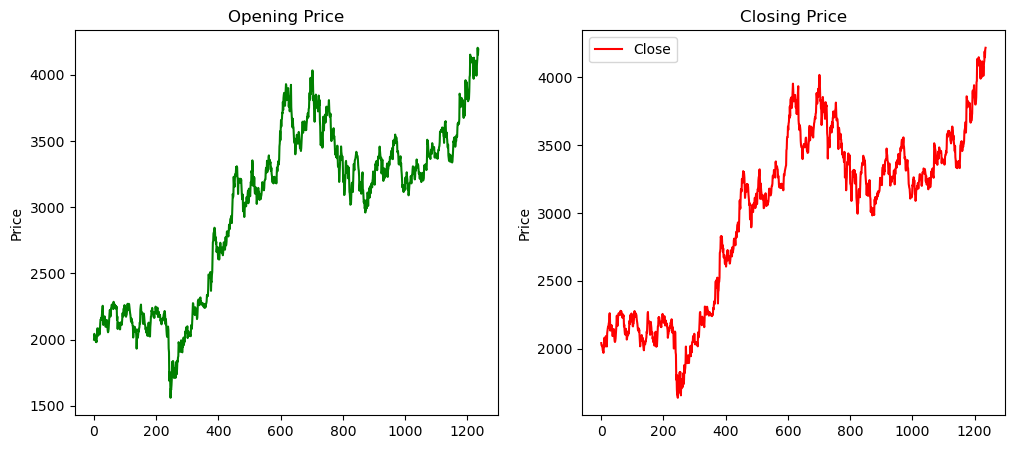

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(data['Open'],label='Open',color='green')
axs[0].set_title('Opening Price')
axs[0].set_ylabel('Price')

axs[1].plot(data['Close'],label='Close',color='red')
axs[1].set_title('Closing Price')
axs[1].set_ylabel('Price')

#plt.tight_layout()
plt.legend()
plt.show()

In [7]:
X = data.loc[:,['Open','High','Low','Volume','RSI','EMA','MACD']]
Y = data['Close']

In [8]:
X.head()

,Open,High,Low,Volume,RSI,EMA,MACD
0,1998.900024,2068.949951,1991.000000,5184318,NaN,2039.949951,0.000000
1,2043.000000,2064.600098,2011.000000,2349915,NaN,2036.831787,-1.368083
2,2030.000000,2030.000000,1995.099976,2373993,NaN,2034.280562,-2.424353
3,2028.000000,2044.800049,2000.000000,3091165,NaN,2030.784105,-3.842520
4,2015.000000,2016.000000,1983.300049,3148149,NaN,2026.214272,-5.659690


In [9]:
X[X.columns].isnull().sum()

Open       0
High       0
Low        0
Volume     0
RSI       14
EMA        0
MACD       0
dtype: int64

In [10]:
X['RSI'] = X['RSI'].fillna(0)

In [11]:
X[X.columns].isnull().sum()

Open      0
High      0
Low       0
Volume    0
RSI       0
EMA       0
MACD      0
dtype: int64

In [12]:
Y = pd.DataFrame(Y)
Y.head()

,Close
0,2039.949951
1,2022.800049
2,2022.800049
3,2015.050049
4,2005.650024


In [13]:
Y.isnull().sum()

Close    0
dtype: int64

In [14]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X[X.columns] = ms.fit_transform(X)
Y[Y.columns] = ms.fit_transform(Y)

In [15]:
X.head()

,Open,High,Low,Volume,RSI,EMA,MACD
0,0.166030,0.150066,0.181565,0.252864,0.0,0.123848,0.477621
1,0.182701,0.148363,0.189053,0.108362,0.0,0.122550,0.472441
2,0.177787,0.134824,0.183100,0.109589,0.0,0.121489,0.468442
3,0.177031,0.140616,0.184934,0.146152,0.0,0.120033,0.463073
4,0.172117,0.129346,0.178682,0.149057,0.0,0.118132,0.456193


In [16]:
X.shape

(1236, 7)

In [17]:
X = np.array(X)
Y = np.array(Y)
Y

array([[0.15625846],
       [0.14961867],
       [0.14961867],
       ...,
       [0.97280189],
       [0.9954896 ],
       [1.        ]])

In [18]:
time_steps = 1 #each day data for each iteration
X = np.reshape(X, (X.shape[0], time_steps, X.shape[1]))
X

array([[[0.16603034, 0.15006554, 0.1815646 , ..., 0.        ,
         0.12384803, 0.47762091]],

       [[0.18270141, 0.14836342, 0.18905257, ..., 0.        ,
         0.12255035, 0.47244135]],

       [[0.17778703, 0.13482422, 0.18309962, ..., 0.        ,
         0.12148861, 0.46844232]],

       ...,

       [[1.        , 1.        , 0.98311459, ..., 0.64248239,
         0.98586491, 0.64545737]],

       [[0.98051268, 0.99373912, 0.96592972, ..., 0.6184259 ,
         0.99315437, 0.66395396]],

       [[0.99531248, 0.99921739, 1.        , ..., 0.66481331,
         1.        , 0.67984061]]])

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [20]:
X_train.shape

(988, 1, 7)

## LSTM Model: 

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[0], X_train.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

F:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 988, 50)             │          11,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 988, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,902 (124.62 KB)

 Trainable params: 31,902 (124.62 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.fit(X_train,Y_train,epochs = 100, validation_data = (X_test,Y_test))

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2890 - mean_absolute_error: 0.4792 - val_loss: 0.1003 - val_mean_absolute_error: 0.2593
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0574 - mean_absolute_error: 0.1908 - val_loss: 0.0139 - val_mean_absolute_error: 0.0900
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0106 - mean_absolute_error: 0.0845 - val_loss: 0.0078 - val_mean_absolute_error: 0.0675
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072 - mean_absolute_error: 0.0684 - val_loss: 0.0039 - val_mean_absolute_error: 0.0490
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - mean_absolute_error: 0.0498 - val_loss: 0.0018 - val_mean_absolute_error: 0.0314
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 - mean_absolute_error: 0.0402 - val_loss: 8.2398e-04 - val_mean_absolute_error: 0.0233
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 - mean_absolute_error: 0.0343 - val

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2114e-04 - mean_absolute_error: 0.0188 - val_loss: 1.5207e-04 - val_mean_absolute_error: 0.0088
Epoch 45/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6339e-04 - mean_absolute_error: 0.0198 - val_loss: 1.2918e-04 - val_mean_absolute_error: 0.0084
Epoch 46/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5876e-04 - mean_absolute_error: 0.0177 - val_loss: 2.1101e-04 - val_mean_absolute_error: 0.0105
Epoch 47/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8911e-04 - mean_absolute_error: 0.0185 - val_loss: 1.3330e-04 - val_mean_absolute_error: 0.0088
Epoch 48/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3376e-04 - mean_absolute_error: 0.0191 - val_loss: 1.2973e-04 - val_mean_absolute_error: 0.0087
Epoch 49/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1257e-04 - mean_absolute_error: 0.0196 - val_loss: 1.3825e-04 - val_mean_absolute_error: 0.0084
Epoch 50/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.117

Epoch 87/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0846e-04 - mean_absolute_error: 0.0153 - val_loss: 1.3449e-04 - val_mean_absolute_error: 0.0089
Epoch 88/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6798e-04 - mean_absolute_error: 0.0178 - val_loss: 1.2223e-04 - val_mean_absolute_error: 0.0081
Epoch 89/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2456e-04 - mean_absolute_error: 0.0158 - val_loss: 1.1638e-04 - val_mean_absolute_error: 0.0080
Epoch 90/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0934e-04 - mean_absolute_error: 0.0155 - val_loss: 1.3230e-04 - val_mean_absolute_error: 0.0084
Epoch 91/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8088e-04 - mean_absolute_error: 0.0152 - val_loss: 1.5094e-04 - val_mean_absolute_error: 0.0096
Epoch 92/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0545e-04 - mean_absolute_error: 0.0153 - val_loss: 1.1806e-04 - val_mean_absolute_error: 0.0080
Epoch 93/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

In [23]:
pred = model.predict(X_test)
pred

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.81018585, 0.8089004 ],
       [0.6842267 , 0.683132  ],
       [0.7751343 , 0.7736843 ],
       [0.60438263, 0.6032011 ],
       [0.8437426 , 0.84224015],
       [0.20360604, 0.20321284],
       [0.8045394 , 0.8032871 ],
       [0.5896253 , 0.5886091 ],
       [0.5485396 , 0.54752654],
       [0.24155688, 0.241343  ],
       [0.64292425, 0.6417922 ],
       [0.6226414 , 0.62163347],
       [0.7551245 , 0.75402915],
       [0.76108354, 0.75981545],
       [0.16631648, 0.16611946],
       [0.24106342, 0.24082334],
       [0.3233522 , 0.32328677],
       [0.68309003, 0.6817799 ],
       [0.6316808 , 0.63060766],
       [0.18071318, 0.18035439],
       [0.61564565, 0.6145162 ],
       [0.59810895, 0.5969133 ],
       [0.4521373 , 0.4514893 ],
       [0.7124315 , 0.71113473],
       [0.74385166, 0.74262255],
       [0.6940188 , 0.692692  ],
       [0.6419608 , 0.6408977 ],
       [0.19485143, 0.19473618],
       [0.6138994 , 0.6128736 ],
       [0.848569  , 0.8470933 ],
       [0.

In [24]:
inverse_pred = ms.inverse_transform(pred)
inverse_pred

array([[3728.9792, 3725.659 ],
       [3403.6392, 3400.8118],
       [3638.4443, 3634.6995],
       [3197.41  , 3194.3582],
       [3815.6528, 3811.7722],
       [2162.2441, 2161.2285],
       [3714.3948, 3711.1604],
       [3159.2932, 3156.6685],
       [3053.173 , 3050.5564],
       [2260.2673, 2259.7148],
       [3296.9592, 3294.035 ],
       [3244.5706, 3241.9673],
       [3586.7612, 3583.932 ],
       [3602.1528, 3598.8772],
       [2065.929 , 2065.42  ],
       [2258.9927, 2258.3726],
       [2471.5364, 2471.3674],
       [3400.7034, 3397.3196],
       [3267.9185, 3265.1467],
       [2103.114 , 2102.1873],
       [3226.501 , 3223.584 ],
       [3181.2058, 3178.1174],
       [2804.1755, 2802.5017],
       [3476.4895, 3473.14  ],
       [3557.6445, 3554.47  ],
       [3428.9312, 3425.5042],
       [3294.4707, 3291.7249],
       [2139.6318, 2139.334 ],
       [3221.991 , 3219.3413],
       [3828.119 , 3824.3074],
       [3000.521 , 2998.962 ],
       [2141.7527, 2141.0435],
       [

In [29]:
slice_data = pd.concat([data .iloc[-248:].copy(),pd.DataFrame(inverse_pred,columns=['open_predicted','close_predicted'],index=data .iloc[-248:].index)], axis=1)

slice_data

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,13MA,...,ADX,VWAP,Upper_Band,Lower_Band,MACD,Signal_line,%K,%D,open_predicted,close_predicted
988,2023-03-14,3280.000000,3304.399902,3209.399902,3214.949951,3160.082031,2670334,28.310193,3339.783501,3341.173077,...,25.357705,2745.526905,3596.340644,3242.206036,-37.601735,-19.207018,2.283971,8.052150,3728.979248,3725.658936
989,2023-03-15,3250.000000,3260.350098,3192.000000,3198.899902,3144.305908,1780522,30.161516,3340.199500,3324.642296,...,26.182457,2745.813079,3603.375280,3224.518063,-45.773567,-24.520328,2.649733,3.044590,3403.639160,3400.811768
990,2023-03-16,3208.000000,3219.800049,3172.000000,3185.000000,3130.643311,1901060,27.673680,3340.675500,3308.069223,...,27.197952,2746.102175,3601.979880,3211.023457,-52.763187,-30.168899,4.962780,3.298828,3638.444336,3634.699463
991,2023-03-17,3150.500000,3221.399902,3144.000000,3179.300049,3125.041016,6739966,28.093122,3340.851501,3296.334604,...,28.469055,2747.099606,3585.448941,3208.814405,-58.092792,-35.753678,13.527517,7.046677,3197.409912,3194.358154
992,2023-03-20,3169.649902,3169.649902,3095.050049,3143.300049,3089.655029,2289468,30.032826,3340.663501,3283.292293,...,30.147283,2747.401955,3578.421550,3193.241796,-64.478178,-41.498578,15.569543,11.353280,3815.652832,3811.772217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,2024-03-11,4089.000000,4153.000000,4089.000000,4122.350098,4122.350098,2304068,51.474703,3737.309514,4071.738525,...,20.248957,2856.094052,4134.353386,3956.800015,37.215166,44.810008,83.430994,71.248069,3676.351562,3672.365234
1232,2024-03-12,4122.350098,4229.950195,4121.049805,4192.250000,4192.250000,4039801,62.913541,3743.523513,4087.180833,...,20.189092,2857.655670,4158.756310,3958.480425,43.416872,44.531381,86.114121,81.992290,3641.298340,3637.644775
1233,2024-03-13,4205.000000,4241.000000,4131.899902,4149.000000,4149.000000,2837260,62.503964,3749.773013,4091.942364,...,20.254804,2858.744352,4170.305859,3970.160873,44.330837,44.491272,67.439397,78.994837,3833.639160,3829.817139
1234,2024-03-14,4153.450195,4225.000000,4086.000000,4207.600098,4207.600098,2919608,60.163625,3756.778513,4103.903902,...,19.570607,2859.861818,4196.949844,3969.626897,49.216364,45.436291,88.179120,80.577546,2697.394043,2696.298096


In [30]:
df_sample = slice_data.loc[:,['Open','open_predicted','Close','close_predicted']]
df_sample

,Open,open_predicted,Close,close_predicted
988,3280.000000,3728.979248,3214.949951,3725.658936
989,3250.000000,3403.639160,3198.899902,3400.811768
990,3208.000000,3638.444336,3185.000000,3634.699463
991,3150.500000,3197.409912,3179.300049,3194.358154
992,3169.649902,3815.652832,3143.300049,3811.772217
...,...,...,...,...
1231,4089.000000,3676.351562,4122.350098,3672.365234
1232,4122.350098,3641.298340,4192.250000,3637.644775
1233,4205.000000,3833.639160,4149.000000,3829.817139
1234,4153.450195,2697.394043,4207.600098,2696.298096


<Axes: >

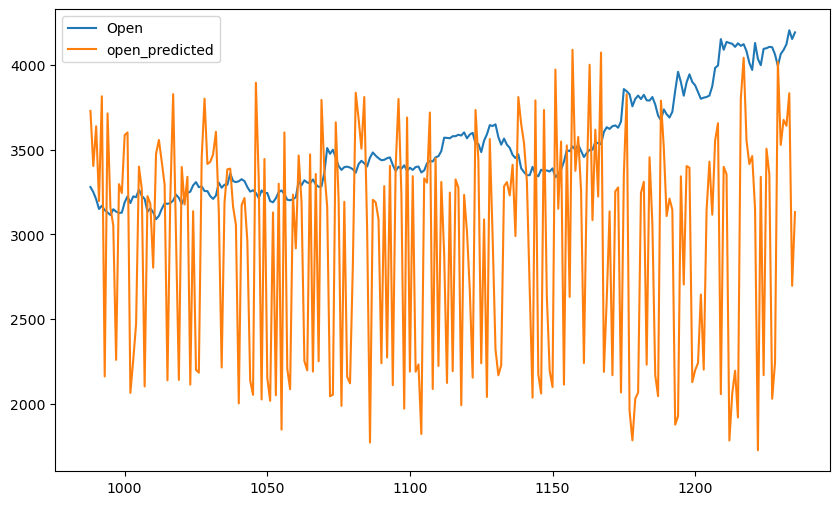

In [27]:
slice_data[['Open','open_predicted']].plot(figsize=(10,6))

<Axes: >

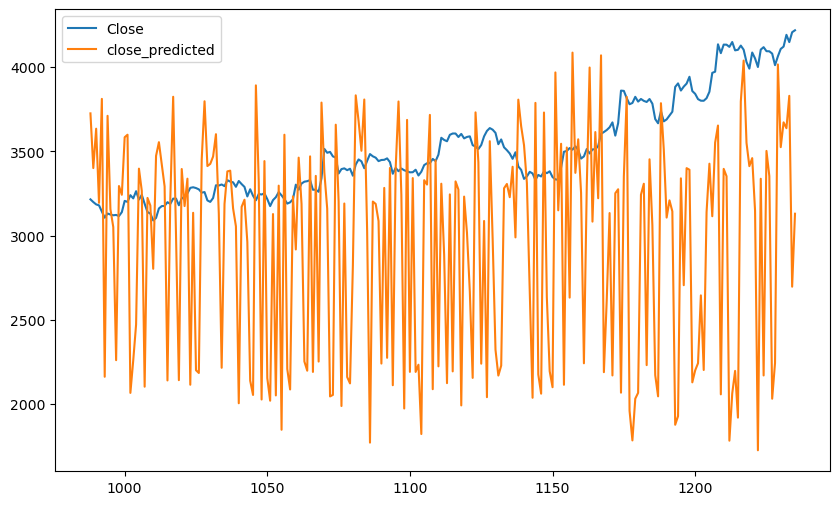

In [28]:
slice_data[['Close','close_predicted']].plot(figsize=(10,6))